In [3]:
!pip install clean-text

     |████████████████████████████████| 53 kB 240 kB/s eta 0:00:01
     |████████████████████████████████| 175 kB 2.8 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171030 sha256=0e5c624801aaaa75e03e1d2a57fb83c623237f53730e1f2e6f5fe845a880ea49
  Stored in directory: /home/aurelio/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [2]:
import tweepy

In [5]:
import re
import unicodedata
import string

In [6]:
from cleantext import clean

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [57]:
#Create your own keys on Twitter Developer
API_KEY = 'hGwC17TsW1W99swjFCXPwi5i9'
API_SECRET = 'KmgC8oGcs7uvl9B7HDMi8KUUSAzsTPOPr3vHVt9XJOiks7C5Lw'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAFqzcgEAAAAAh%2BilS8IkEYr68z%2BPlwkAGa0CAys%3Du3jZnN5YlQE3OS1hZUEq942I1fQ0kbriuNfuUyla7IqJKqL6CF'
ACCESS_TOKEN = '1519454932876808194-D8CTAAIZuvBdrqWuPecRSNX1p0S3cf'
ACCESS_TOKEN_SECRET = 'pUZatEZVOuTqBdFaBFAvts9A3hj3y7PvLaLKTpSIxUac9'

CLIENT_ID = 'UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ'
CLIENT_SECRET = 'V6enZ5OHrb8rjZ-75TfsUCOGy6Xse_kuISE7-jbdmEPnjS8vx4'
REDIRECT_URI = 'https://data-api.twitter.com/insights/engagement' 

In [3]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [4]:
query = 'Lula ladrao OR Bolsonaro gado -is:retweet'

response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'public_metrics'], expansions=['author_id'])

In [5]:
tweets = [tweet for tweet in response.data] 

In [6]:
#Here I prepare an .txt that will append the 100 responses
save_tweets = open('Tweets.txt', 'a')

for tweet in tweets:
    first_line = str(tweet['author_id']) + " " + tweet['text'] + "\n"     
    save_tweets.write(first_line)
    second_line = "retweet_count: " +  str(tweet.public_metrics['retweet_count']) + ", " + "reply_count: " + str(tweet.public_metrics['reply_count']) + ", " + "like_count: " + str(tweet.public_metrics['like_count']) + ", " + "quote_count: " + str(tweet.public_metrics['quote_count']) + "\n"
    save_tweets.write(second_line)
save_tweets.close()

In [25]:
#Here I read the .txt file and separate them in the text of the tweet and the public metrics
read_tweets = open('Tweets.txt', 'r')
user_tweets = []
public_metrics = []
read = read_tweets.read().split('\n')

word = ''
for i in read:
    if i.find('retweet_count: ') != -1:
        public_metrics.append(i)
        user_tweets.append(word)
        word = ''
        continue        
    word += i 

read_tweets.close()
print(user_tweets[:10])
print(len(public_metrics))

['1530301549041295360 @AtilaGPRGPR @diefoduarte7483 @jairbolsonaro Não fundamentada? Kkkk Coisas que nem o bolsonaro nega mas o gado simVcs são deploráveis', '966422258687315971 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1236086201838419968 @DaniloGentili Eu duvido q tenha ladrão maior que Lula e vcs aí nessa ladainha sem fim !!', '1278549436545851392 RT @RCNradiochatnet: O Lula falou! "A profissão mais honesta é a do POLÍTICO, sabe porque? ...por mais ladrão que ele seja, ele tem que ir…', '4821431243 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '35562670 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1196172031718576130 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o 

In [31]:
#Here I remove the duplicated tweets
lenght = len(user_tweets)-1
i = 0
        
while i < lenght:    
    if user_tweets.count(user_tweets[i]) > 1:
        user_tweets.pop(i)
        public_metrics.pop(i)
        lenght -= 1
    i += 1 
    
print(len(user_tweets))

432


In [36]:
def remove_urls(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"http\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_usuario(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"@\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_hashtag(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"#\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

# nova_lista = [w for word in words for w in word if w not in stop_words] brincando com python
def remove_stopwords(lista_tweets):
    words = [word_tokenize(w) for w in lista_tweets]
    stop_words = set(stopwords.words("portuguese"))    
    nova_lista = []
    
    for word in words:
        tweets = []
        for w in word:
            if w not in stop_words:
                tweets.append(w)
        nova_lista.append(tweets)
                
        
    return nova_lista

#Remove os emojis e acentuações
def remove_emojis(lista_tweets):
    nova_lista = []
    for i in lista_tweets:
        nova_lista.append(clean(str(i), lower=False, no_punct=True, no_emoji=True).split(" "))        
    return nova_lista

In [37]:
new_tweets = remove_urls(user_tweets)
new_tweets = remove_usuario(new_tweets)
new_tweets = remove_hashtag(new_tweets)
new_tweets = remove_stopwords(new_tweets)
new_tweets = remove_emojis(new_tweets)

print(len(new_tweets), new_tweets[:10])

432 [['1530301549041295360', 'Nao', 'fundamentada', 'Kkkk', 'Coisas', 'bolsonaro', 'nega', 'gado', 'simVcs', 'deploraveis'], ['966422258687315971', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['1236086201838419968', 'Eu', 'duvido', 'q', 'ladrao', 'maior', 'Lula', 'vcs', 'ai', 'nessa', 'ladainha', 'fim'], ['1278549436545851392', 'RT', 'O', 'Lula', 'falou', 'A', 'profissao', 'honesta', 'POLITICO', 'sabe', 'porque', 'ladrao', 'ir'], ['4821431243', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['35562670', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['1196172031718576130', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 

In [39]:
#Here I'm formating the training data from .txt file
training_data = open('treinamento.txt', 'r').read().split("\n")
documents = []
words = []

#The last element is a empty string
for i in training_data[:len(training_data)-2]:    
    document = i.split(";")
    documents.append((document[1], document[0]))
    words.append(document[2].split("'")[1])
print(documents[:10])

[("['votaram', 'pezao', 'agora', 'tomem', 'czao']", 'yes'), ("['cuidado', 'poupanca', 'pessoal', 'lembram', 'aconteceu', 'epoca', 'collor', 'ne']", 'no'), ("['sabe', 'acho', 'engracado', 'governantes', 'nao', 'pensam', 'cortar', 'regalias', 'beneficios', 'desnecessarios', 'favorecem', 'porque', 'sera', 'ne', 'claro', 'ate', 'nao', 'quer', 'enxergar', 'sao', 'estao', 'la', 'defender', 'proprios', 'interesses', 'empresario', 'casso', 'tambem', 'comecamos', 'tomar', 'atitude', 'mudar', 'vez', 'todas', 'roubalheira', 'nesse', 'pais', 'tendencia', 'so', 'piorar', 'povo', 'porque', 'dinheiro', 'investimentos', 'nao', 'aumentos', 'salario', 'regalias', 'nao', 'falta']", 'no'), ("['podiam', 'retirar', 'lucros', 'bancos']", 'no'), ("['cade', 'o', 'galvao', 'pra', 'narrar', 'agora', 'faliiiiuuuuuuu', 'faliiiuuuuuuu', 'faliiuuuuuuu']", 'no'), ("['nao', 'possivel', 'deputados', 'tantos', 'cargos', 'comissionados', 'dispor', 'e', 'tipo', 'coisa', 'precisa', 'ser', 'cortado']", 'no'), ("['sejam', 'h

In [34]:
#Here I'm creating the list of Freq for each word
all_words = []
for i in words:
    for j in word_tokenize(i):
        all_words.append(j.lower())

freq_words = nltk.FreqDist(all_words)
print(freq_words.most_common(15))

[('e', 659), ('o', 442), ('que', 404), ('de', 402), ('a', 331), ('nao', 295), ('do', 177), ('da', 137), ('com', 127), ('um', 124), ('os', 122), ('no', 120), ('para', 116), ('em', 105), ('se', 101)]


In [41]:
word_feature = list(freq_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_feature:
        #the key is the word in the 3000 most popular words
        #is gonna be the boolean value for w in words
        features[w] = (w in words)
        
    return features

print(find_features(all_words))

{'votaram': True, 'no': True, 'pezao': True, 'agora': True, 'tomem': True, 'czao': True, 'cuidado': True, 'com': True, 'a': True, 'poupanca': True, 'pessoal': True, 'lembram': True, 'o': True, 'que': True, 'aconteceu': True, 'na': True, 'epoca': True, 'do': True, 'collor': True, 'ne': True, 'sabe': True, 'eu': True, 'acho': True, 'engracado': True, 'os': True, 'nossos': True, 'governantes': True, 'nao': True, 'pensam': True, 'em': True, 'cortar': True, 'regalias': True, 'e': True, 'beneficios': True, 'desnecessarios': True, 'favorecem': True, 'porque': True, 'sera': True, 'mais': True, 'claro': True, 'ate': True, 'mesmo': True, 'para': True, 'quem': True, 'quer': True, 'enxergar': True, 'eles': True, 'sao': True, 'estao': True, 'la': True, 'defender': True, 'seus': True, 'proprios': True, 'interesses': True, 'dos': True, 'empresario': True, 'casso': True, 'tambem': True, 'ou': True, 'comecamos': True, 'tomar': True, 'uma': True, 'atitude': True, 'mudar': True, 'de': True, 'vez': True, 

In [42]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

In [12]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0

for i in public_metrics:
    number = ''
    for j in i:
        if j in numbers:
            number += j
        if j == ',':
            if count == 0:
                retweet_count.append(int(number))
                number = ''
                count += 1
            elif count == 1:
                reply_count.append(int(number))
                number = ''
                count += 1
            elif count == 2:
                like_count.append(int(number))
                number = ''
                count += 1
    if i.endswith(number):
        quote_count.append(int(number))
        number = ''
        count = 0 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
total_retweets = sum(retweet_count)
total_reply = sum(reply_count)
total_like = sum(like_count)
total_quote = sum(quote_count)

Text(0.5, 0.98, 'Engagement')

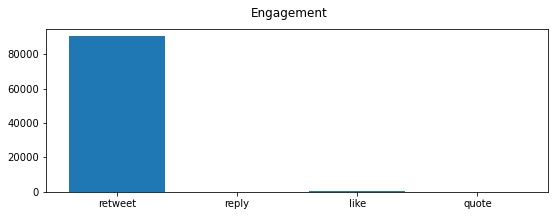

In [15]:
x_plot = ["retweet", "reply", "like", "quote"]
y_plot = [total_retweets, total_reply, total_like, total_quote]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_plot, y_plot)
fig.suptitle('Engagement')

In [16]:
print(total_retweets, total_reply, total_like, total_quote)

90293 40 238 4


In [17]:
def getFollwersOfMostRetweetUser(user_tweets, retweet_count):
    index_max = retweet_count.index(max(retweet_count))
    user_with_most_retweets = user_tweets[index_max].split(" ")
    id_user_with_most_retweets = user_with_most_retweets[0]    
    
    followers = client.get_users_followers(int(id_user_with_most_retweets), max_results=1000)[0]
    
    return (max(retweet_count), len(followers), user_with_most_retweets)

max_retweets, followers_count, user_most_retweets = getFollwersOfMostRetweetUser(user_tweets, retweet_count)

In [18]:
print(max_retweets, followers_count)

2080 143


<BarContainer object of 2 artists>

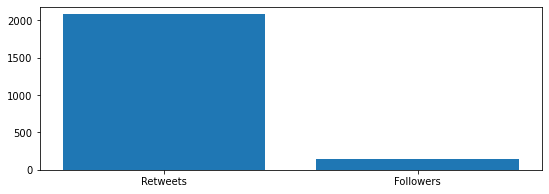

In [19]:
x_user_most_retweets = ['Retweets', 'Followers']
y_user_most_retweets = [max_retweets, followers_count]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_user_most_retweets, y_user_most_retweets)

In [45]:
print(user_most_retweets[1:])

['RT', '@EduardoTreesp:', 'Augusto', 'Nunes', 'detona', 'Fachin:', '“É', 'o', 'maior', 'farsante', 'do', 'STF,', 'pois', 'fingiu', 'por', '2', 'anos', 'apoiar', 'a', 'lava', 'jato', 'para', 'depois', 'soltar', 'o…']
100


In [59]:
oauth2_user_handler = tweepy.OAuth2UserHandler(client_id=CLIENT_ID, redirect_uri=REDIRECT_URI, scope=['tweet.read', 'users.read', 'offline.access'])

print(oauth2_user_handler.get_authorization_url())

https://twitter.com/i/oauth2/authorize?response_type=code&client_id=UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ&redirect_uri=https%3A%2F%2Fdata-api.twitter.com%2Finsights%2Fengagement&scope=tweet.read+users.read+offline.access&state=HzToXgWUZU4o5zPKYMb61DC4xd2x3U&code_challenge=3et0_aCXESjjKB3tIuUOD16gS5Op7bqpwEQiD9Ns18c&code_challenge_method=S256


In [60]:
# full_url = input("Paste in the full URL after you authorized your App: ")
# access_token_auth = oauth2_user_handler.fetch_token(full_url)
# access_auth = access_token_auth['access_token']

Paste in the full URL after you authorized your App: https://twitter.com/i/oauth2/authorize?response_type=code&client_id=UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ&redirect_uri=https%3A%2F%2Fdata-api.twitter.com%2Finsights%2Fengagement&scope=tweet.read+users.read+offline.access&state=HzToXgWUZU4o5zPKYMb61DC4xd2x3U&code_challenge=3et0_aCXESjjKB3tIuUOD16gS5Op7bqpwEQiD9Ns18c&code_challenge_method=S256


MissingCodeError: (missing_code) Missing code parameter in response.